In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
import lib

In [3]:
ns=400
nd=1000
bias = 2.69684 # ndb=3.5
beta1 = 1.0
beta2 = 2.12727
ndR = 15
kappa = 0.655951 # ndb=0.4
la = 0.526754 # ndR = 15

decay_steps = 10000
n_tested_patterns = 500
initial_steps = 5000

seed = 23
rng = np.random.default_rng(seed)

# neuron = Neuron0(n_synapses=ns, n_dendrites=nd, bias=bias, seed=rng.integers(100000))
# neuron = Neuron1(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, ndR=ndR, seed=rng.integers(100000))
# neuron = Neuron2(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, la=0.613098, seed=rng.integers(100000))
neuron = lib.Neuron3(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, seed=rng.integers(100000))
# neuron = lib.Neuron5(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, gamma=0., seed=rng.integers(100000))
# neuron = lib.Neuron6(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, gamma=0.95, beta=0.*ns, seed=rng.integers(100000))

xs_gen = lib.Xs_Generator1(normalized_len=np.sqrt(ns), seed=rng.integers(100000))

# simulation_run = lib.Simulation_Run_Test(neuron, seed=rng.integers(100000), decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)
# simulation_run = lib.Simulation_Run(neuron, seed=rng.integers(100000), decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)
simulation_run = lib.Simulation_Run(neuron, xs_gen, rng.integers(100000), decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns)

In [6]:
simulation_run.run()

  0%|          | 0/10500 [00:00<?, ?it/s]

100%|██████████| 10500/10500 [02:50<00:00, 61.58it/s]


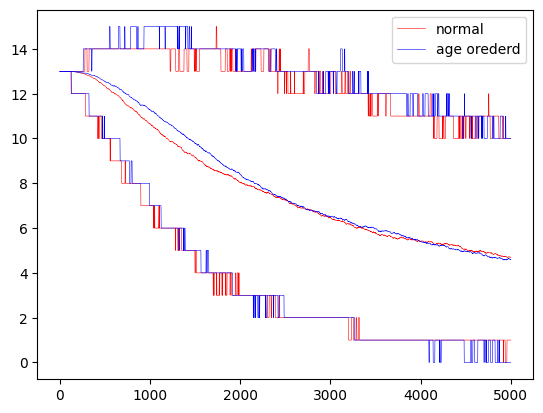

In [38]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

# plt.plot(np.mean(simulation_run3.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="age orederd")
# plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
# plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

plt.legend()

(0.0, 2000.0)

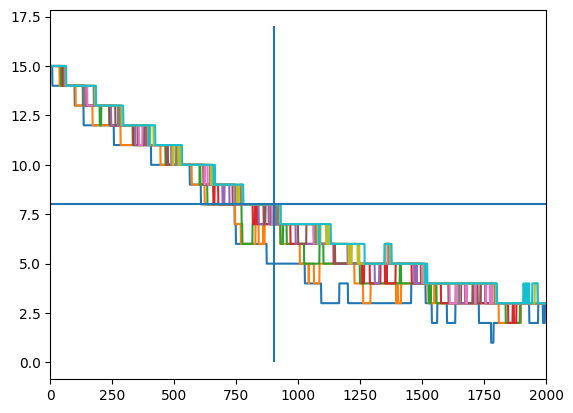

In [50]:
for i in range(-5, 5, 1):
    plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01)+i, :decay_steps])
plt.hlines(8, 0, decay_steps)
plt.vlines(900, 0, 17)
plt.xlim(0, 2000)

(0.0, 10000.0)

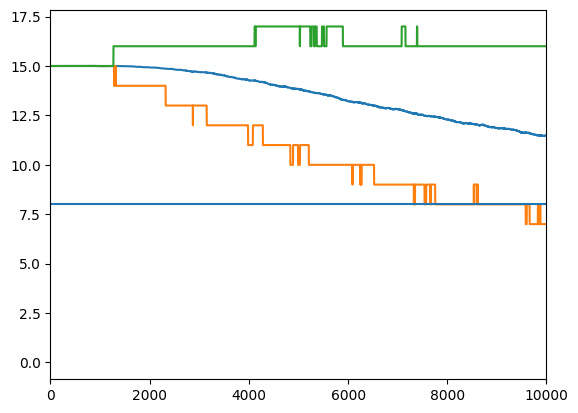

In [13]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps])
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

plt.hlines(8, 0, decay_steps)
# plt.vlines(900, 0, 17)
plt.xlim(0, 10000)

In [80]:
np.mean(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

7.64845

In [21]:
# np.save("data/5.1/votes_same_input_int_mean", np.mean(simulation_run.votes_record, axis=0)[:decay_steps])
# np.save("data/5.1/votes_same_input_int_lower99", np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/5.1/votes_same_input_int_upper99", np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [4]:
ns=400
nd=1000
bias = 2.69684 # ndb=3.5
beta1 = 1.0
beta2 = 2.12727
ndR = 15
kappa = 0.655951 # ndb=0.4
la = 0.526754 # ndR = 15
n0 = 8

decay_steps = 10000
n_tested_patterns = 500
initial_steps = 5000

# neuron = Neuron0(n_synapses=ns, n_dendrites=nd, bias=bias, seed=11111)
# neuron = Neuron1(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, ndR=ndR, seed=123456)
# neuron = Neuron2(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, la=0.613098, seed=11111)
neuron2 = lib.Neuron3(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, seed=11111)
simulation_run2 = lib.Simulation_Run2(neuron2, seed=123456, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, normalized_xQ=True)

In [5]:
simulation_run2.run()

100%|██████████| 10500/10500 [1:46:07<00:00,  1.65it/s] 


In [16]:
meanlist = np.genfromtxt("data/5.1/mean_int.csv", delimiter=",")

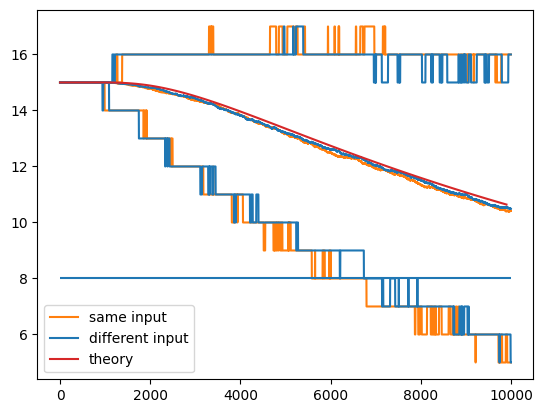

In [19]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="#ff7f0e", label="same input")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#ff7f0e")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#ff7f0e")

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="#1f77b4", label="different input")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#1f77b4")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#1f77b4")

plt.plot(meanlist[:, 0], meanlist[:, 1], c="#d62728", label="theory")

plt.hlines(8, 0, decay_steps)
# plt.vlines(900, 0, 17)
# plt.xlim(0, 2000)
# plt.ylim(10, 12)
plt.legend()

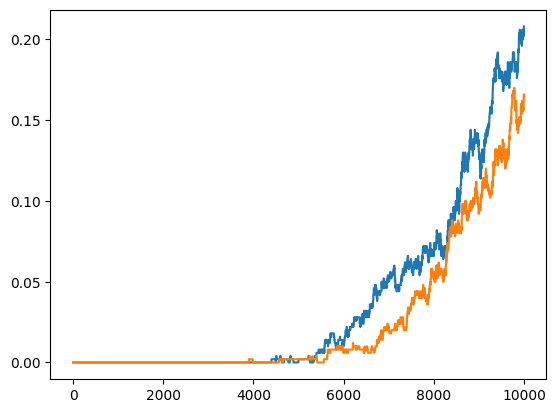

In [41]:
plt.plot(np.mean(simulation_run.votes_record <= n0, axis=0)[:decay_steps])
plt.plot(np.mean(simulation_run2.votes_record <= n0, axis=0)[:decay_steps])

In [38]:
# np.save("data/5.1/false_negative_same_input_int", np.mean(simulation_run.votes_record <= n0, axis=0)[:decay_steps])
# np.save("data/5.1/false_negative_diff_input_int", np.mean(simulation_run2.votes_record <= n0, axis=0)[:decay_steps])

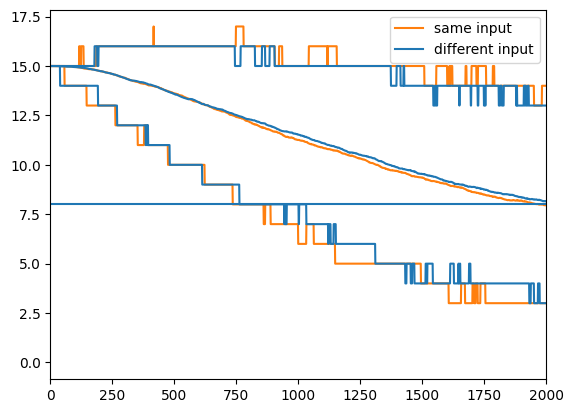

In [55]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="#ff7f0e", label="same input")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#ff7f0e")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#ff7f0e")

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="#1f77b4", label="different input")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="#1f77b4")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="#1f77b4")

plt.hlines(8, 0, decay_steps)
# plt.vlines(900, 0, 17)
plt.xlim(0, 2000)
plt.legend()

In [ ]:
# np.save("data/5.1/votes_diff_input_int_mean", np.mean(simulation_run2.votes_record, axis=0)[:decay_steps])
# np.save("data/5.1/votes_diff_input_int_lower99", np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/5.1/votes_diff_input_int_upper99", np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [63]:
# np.save("data/4/votes_diff_input_int", simulation_run.votes_record)
# np.save("data/4/votes_same_input_int", simulation_run2.votes_record)

In [81]:
np.mean(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

7.97555

In [23]:
ns=200
nd=300
bias = 2.32635 # ndb=3
beta1 = 1.0
beta2 = 2.12727
ndR = 10
kappa = 0.6774 # ndb=0.4
la = 0.492433 # ndR = 10

decay_steps = 3000
n_tested_patterns = 2000
initial_steps = 5000


# neuron = Neuron0(n_synapses=ns, n_dendrites=nd, bias=bias, seed=11111)
# neuron = Neuron1(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, ndR=ndR, seed=123456)
# neuron = Neuron2(n_synapses=ns, n_dendrites=nd, bias=bias, beta1=beta1, beta2=beta2, la=0.613098, seed=11111)
neuron3 = Neuron4(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, seed=11111)
simulation_run3 = Simulation_Run(neuron3, seed=123456, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, normalized_xQ=True)

In [24]:
simulation_run3.run()

100%|██████████| 5000/5000 [01:05<00:00, 76.67it/s] 


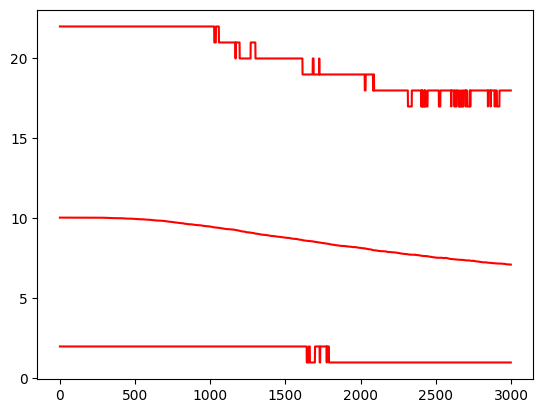

In [25]:
plt.plot(np.mean(simulation_run3.votes_record, axis=0)[:decay_steps], c="red")
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red")
plt.plot(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red")

In [84]:
np.mean(np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-20000:decay_steps])

11.2402

In [64]:
# np.save("data/4/votes_same_input_non_int", simulation_run3.votes_record)

In [88]:
# np.save("data/1.2/votes_same_input_non_int_mean", np.mean(simulation_run3.votes_record, axis=0)[:decay_steps])
# np.save("data/1.2/votes_same_input_non_int_lower99", np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps])
# np.save("data/1.2/votes_same_input_non_int_upper99", np.sort(simulation_run3.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps])

In [26]:
meanlist = np.genfromtxt("data/1.2/mean_int.csv")
lower99list = np.genfromtxt("data/1.2/lower99_int.csv")
upper99list = np.genfromtxt("data/1.2/upper99_int.csv")

# meanlist_non_int = np.genfromtxt("data/mean_non_int.csv")
# lower99list_non_int = np.genfromtxt("data/lower99_non_int.csv")
# upper99list_non_int = np.genfromtxt("data/upper99_non_int.csv")

In [105]:
# votes_record1 = np.load("data/1/votes_diff_input_int.npy")
# votes_record2 = np.load("data/1/votes_same_input_int.npy")
# votes_record3 = np.load("data/1/votes_same_input_non_int.npy")

# votes1_mean = np.mean(votes_record1, axis=0)[:decay_steps]
# votes1_lower99 = np.sort(votes_record1, axis=0)[int(n_tested_patterns*0.01)]
# votes1_upper99 = np.sort(votes_record1, axis=0)[int(n_tested_patterns*0.99), :decay_steps]
# votes2_mean = np.mean(votes_record2, axis=0)[:decay_steps]
# votes2_lower99 = np.sort(votes_record2, axis=0)[int(n_tested_patterns*0.01)]
# votes2_upper99 = np.sort(votes_record2, axis=0)[int(n_tested_patterns*0.99), :decay_steps]
# votes3_mean = np.mean(votes_record3, axis=0)[:decay_steps]
# votes3_lower99 = np.sort(votes_record3, axis=0)[int(n_tested_patterns*0.01)]
# votes3_upper99 = np.sort(votes_record3, axis=0)[int(n_tested_patterns*0.99), :decay_steps]

################################################################################################

votes1_mean = np.load("data/1.2/votes_diff_input_int_mean.npy")
votes1_lower99 = np.load("data/1.2/votes_diff_input_int_lower99.npy")
votes1_upper99 = np.load("data/1.2/votes_diff_input_int_upper99.npy")
votes2_mean = np.load("data/1.2/votes_same_input_int_mean.npy")
votes2_lower99 = np.load("data/1.2/votes_same_input_int_lower99.npy")
votes2_upper99 = np.load("data/1.2/votes_same_input_int_upper99.npy")
votes3_mean = np.load("data/1.2/votes_same_input_non_int_mean.npy")
votes3_lower99 = np.load("data/1.2/votes_same_input_non_int_lower99.npy")
votes3_upper99 = np.load("data/1.2/votes_same_input_non_int_upper99.npy")

ValueError: x and y must have same first dimension, but have shapes (60,) and (800,)

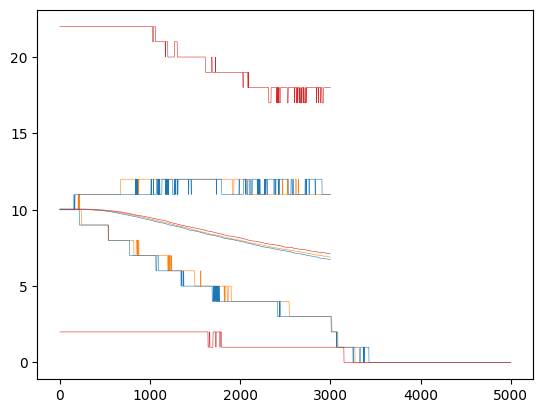

In [32]:
plt.plot(votes1_mean, c="#ff7f0e", linewidth=0.4, label="different input")
plt.plot(votes1_lower99, c="#ff7f0e", linewidth=0.4)
plt.plot(votes1_upper99, c="#ff7f0e", linewidth=0.4)

plt.plot(votes2_mean, c="#1f77b4", linewidth=0.4, label="same input, int")
plt.plot(votes2_lower99, c="#1f77b4", linewidth=0.4)
plt.plot(votes2_upper99, c="#1f77b4", linewidth=0.4)

plt.plot(votes3_mean, c="#d62728", linewidth=0.4, label="same input, non-int")
plt.plot(votes3_lower99, c="#d62728", linewidth=0.4)
plt.plot(votes3_upper99, c="#d62728", linewidth=0.4)

plt.plot(np.arange(0, decay_steps, 50), meanlist, c="#2ca02c", label="theoretical int")
plt.plot(np.arange(0, decay_steps, 50), lower99list, c="#2ca02c")
plt.plot(np.arange(0, decay_steps, 50), upper99list, c="#2ca02c")

# plt.plot(np.arange(0, 50000, 50), meanlist_non_int, c="#9467bd", label="theoretical non-int")
# plt.plot(np.arange(0, 50000, 50), lower99list_non_int, c="#9467bd")
# plt.plot(np.arange(0, 50000, 50), upper99list_non_int, c="#9467bd")

plt.legend()
plt.xlabel("# steps")
plt.ylabel("# active dendrites")

(0.0, 10000.0)

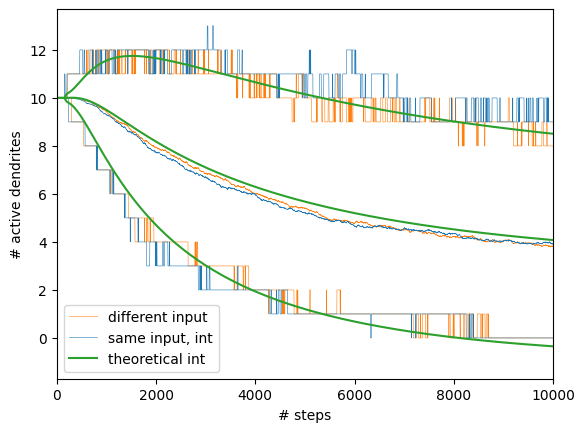

In [98]:
plt.plot(votes1_mean, c="#ff7f0e", linewidth=0.4, label="different input")
plt.plot(votes1_lower99, c="#ff7f0e", linewidth=0.4)
plt.plot(votes1_upper99, c="#ff7f0e", linewidth=0.4)

plt.plot(votes2_mean, c="#1f77b4", linewidth=0.4, label="same input, int")
plt.plot(votes2_lower99, c="#1f77b4", linewidth=0.4)
plt.plot(votes2_upper99, c="#1f77b4", linewidth=0.4)

# plt.plot(votes3_mean, c="#d62728", linewidth=0.4, label="same input, non-int")
# plt.plot(votes3_lower99, c="#d62728", linewidth=0.4)
# plt.plot(votes3_upper99, c="#d62728", linewidth=0.4)

plt.plot(np.arange(0, decay_steps, 50), meanlist, c="#2ca02c", label="theoretical int")
plt.plot(np.arange(0, decay_steps, 50), lower99list, c="#2ca02c")
plt.plot(np.arange(0, decay_steps, 50), upper99list, c="#2ca02c")

# plt.plot(np.arange(0, 50000, 50), meanlist_non_int, c="#9467bd", label="theoretical non-int")
# plt.plot(np.arange(0, 50000, 50), lower99list_non_int, c="#9467bd")
# plt.plot(np.arange(0, 50000, 50), upper99list_non_int, c="#9467bd")


plt.legend()
plt.xlabel("# steps")
plt.ylabel("# active dendrites")
plt.xlim(0, 10000)

In [85]:
tmp = np.random.normal(0, 1/np.sqrt(1000), (1000, ))

In [86]:
np.sum(tmp**2)

0.9810223696095234